In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
# read csv
df = pd.read_csv('StressLevelDataset.csv')

df.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


In [3]:
# print feature names
print(df.columns)

Index(['anxiety_level', 'self_esteem', 'mental_health_history', 'depression',
       'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem',
       'noise_level', 'living_conditions', 'safety', 'basic_needs',
       'academic_performance', 'study_load', 'teacher_student_relationship',
       'future_career_concerns', 'social_support', 'peer_pressure',
       'extracurricular_activities', 'bullying', 'stress_level'],
      dtype='object')


In [4]:
# convert data to numpy array
X = df.drop('mental_health_history', axis=1).values
Y = df['mental_health_history'].values

# Data split

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(880, 20)
(880,)
(220, 20)
(220,)


In [36]:
# Create model
clf = RandomForestClassifier() # You must change in this line

# Fit model
clf.fit(x_train, y_train)

RandomForestClassifier()

In [38]:
# Model validation
clf.score(x_test, y_test)

0.9636363636363636

# Try difference classifier

In [32]:
import pandas as pd
import seaborn as sns
import time

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier

In [33]:
names = ["Nearest_Neighbors", "Linear_SVM", "Polynomial_SVM", "RBF_SVM", "Gaussian_Process",
         "Gradient_Boosting", "Decision_Tree", "Extra_Trees", "Random_Forest", "Neural_Net", "AdaBoost",
         "Naive_Bayes", "QDA", "SGD"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(kernel="poly", degree=3, C=0.025),
    SVC(kernel="rbf", C=1, gamma=2),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),
    DecisionTreeClassifier(max_depth=5),
    ExtraTreesClassifier(n_estimators=10, min_samples_split=2),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(n_estimators=100),``
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    SGDClassifier(loss="hinge", penalty="l2"),]

In [61]:
# iterate over classifiers
scores = []
training_times = []

for name, clf in zip(names, classifiers):
    start_time = time.time()

    clf.fit(x_train, y_train) # model fit here

    end_time = time.time()
    training_time = end_time - start_time
    training_times.append(training_time)

    score = clf.score(x_test, y_test)
    scores.append(score)
    print(f"{name} - Accuracy: {score:.4f} - Training Time: {training_time:.4f} seconds")


Nearest_Neighbors - Accuracy: 0.7682 - Training Time: 0.0030 seconds
Linear_SVM - Accuracy: 0.8182 - Training Time: 0.0189 seconds
Polynomial_SVM - Accuracy: 0.8045 - Training Time: 0.0185 seconds
RBF_SVM - Accuracy: 0.4773 - Training Time: 0.0516 seconds
Gaussian_Process - Accuracy: 0.7864 - Training Time: 2.5740 seconds
Gradient_Boosting - Accuracy: 0.7682 - Training Time: 0.1081 seconds
Decision_Tree - Accuracy: 0.7909 - Training Time: 0.0016 seconds
Extra_Trees - Accuracy: 0.8364 - Training Time: 0.0104 seconds
Random_Forest - Accuracy: 0.8091 - Training Time: 0.0886 seconds
Neural_Net - Accuracy: 0.8182 - Training Time: 0.5962 seconds
AdaBoost - Accuracy: 0.7955 - Training Time: 0.1050 seconds
Naive_Bayes - Accuracy: 0.7773 - Training Time: 0.0008 seconds
QDA - Accuracy: 0.7545 - Training Time: 0.0094 seconds
SGD - Accuracy: 0.7364 - Training Time: 0.0040 seconds


In [70]:
df = pd.DataFrame()
df['name'] = names
df['score'] = scores

# highlight the maximum in a Series or DataFrame
df.style.highlight_max(color = 'lightgreen', axis = 0, subset = 'score')


,name,score
0,Nearest_Neighbors,0.768182
1,Linear_SVM,0.818182
2,Polynomial_SVM,0.804545
3,RBF_SVM,0.477273
4,Gaussian_Process,0.786364
5,Gradient_Boosting,0.768182
6,Decision_Tree,0.790909
7,Extra_Trees,0.836364
8,Random_Forest,0.809091
9,Neural_Net,0.818182


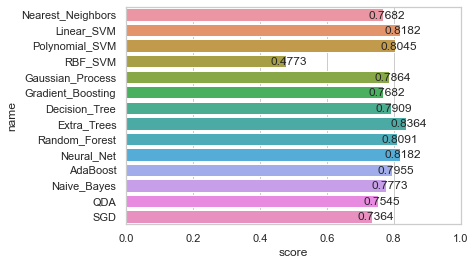

In [80]:
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=df)
ax.set(xlim=(0, 1))

# label each bar in barplot
for p in ax.patches:
    width = p.get_width()
    plt.text(0.01 + p.get_width(), p.get_y() + 0.55 * p.get_height(),
             '{:1.4f}'.format(width),
             ha='center', va='center')

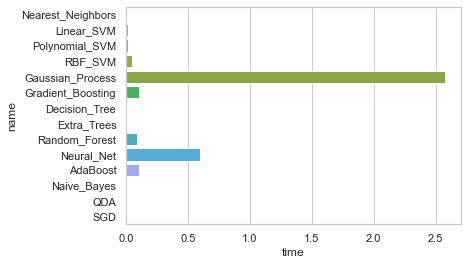

In [65]:
# plot time
df = pd.DataFrame()
df['name'] = names
df['time'] = training_times

sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="time", data=df)

In [ ]:
acc_list = []

for i in range(100):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
    clf = RandomForestClassifier()
    clf.fit(x_train, y_train)
    acc_list.append(clf.score(x_test, y_test))

acc_mean = np.mean(acc_list)
acc_std = np.std(acc_list)

x_axis = np.arange(0.65, 0.9, 0.01)

plt.plot(x_axis, norm.pdf(x_axis, acc_mean, acc_std))
plt.xlabel('Accuracy')
plt.show()

In [62]:
# names_err = ["Nearest_Neighbors", "Polynomial_SVM", "RBF_SVM", "Gaussian_Process", "Gradient_Boosting", "AdaBoost", "Naive_Bayes", "QDA"]

# iterate over classifiers
acc_mean_list = []
acc_std_list = []

for name, clf in zip(names, classifiers):
    acc_list = []
    
    for i in range(100):
        x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
        clf.fit(x_train, y_train) # model fit here
        acc = clf.score(x_test, y_test)
        acc_list.append(acc)

    acc_mean = np.mean(acc_list)
    acc_mean_list.append(acc_mean)
    acc_std = np.std(acc_list)
    acc_std_list.append(acc_std)

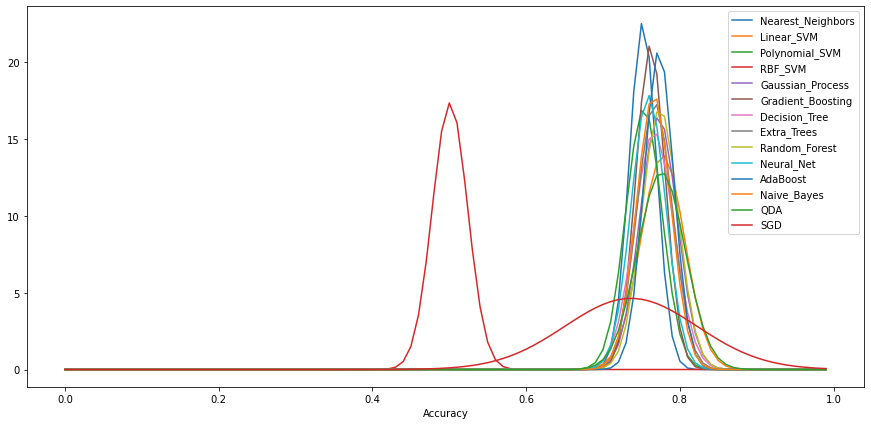

In [61]:
plt.figure(figsize=(15, 7))
for name, acc_mean, acc_std in zip(names, acc_mean_list, acc_std_list):
    x_axis = np.arange(0, 1, 0.01)
    plt.plot(x_axis, norm.pdf(x_axis, acc_mean, acc_std), label=name)

# change figure size
plt.xlabel('Accuracy')
plt.legend()
plt.show()

In [26]:
def calculate_acc_3d_mat(cm):
    """
    This is a function for calculating accuracy from 3d confusion matrix
    """
    return (cm[0,0] + cm[1,1] + cm[2,2]) / (cm[0,0] + cm[0,1] + cm[0,2] + cm[1,0] + cm[1,1] + cm[1,2]+ cm[2,0] + cm[2,1] + cm[2,2])

In [28]:
values = np.array([
    [71, 1, 3],
    [4, 67, 1],
    [7, 3, 63]
])

In [29]:
calculate_acc_3d_mat(values)

0.9136363636363637